In [1]:
# Load required libraries
library(tidyverse) # for data manipulation

# Define the directory path
dir_path <- "/kaggle/input"

# List all files in the directory and print their paths
files <- list.files(path = dir_path, full.names = TRUE, recursive = TRUE)
print(files)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.4.4     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.3.0     ✔ stringr 1.5.1
✔ readr   2.1.5     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



character(0)


In [4]:
# Load required libraries
library(tidyverse) # for data manipulation
library(ggplot2) # for plotting

library(randomForest) # for random forest classifier
library(e1071) # for support vector machine classifier
library(class) # for k-nearest neighbors classifier


In [5]:
# Load required libraries
library(tidyverse) # for data manipulation

# Read the CSV file
df_train_original <- read.csv('../input/credit-score-classification/train.csv')

# Create a copy of the dataframe
df_train <- df_train_original

# Display the first few rows of the dataframe
head(df_train)


ID   Customer_ID Month    Name          Age  SSN         Occupation
1 5634 CUS_0xd40   January  Aaron Maashoh 23   821-00-0265 Scientist 
2 5635 CUS_0xd40   February Aaron Maashoh 23   821-00-0265 Scientist 
3 5636 CUS_0xd40   March    Aaron Maashoh -500 821-00-0265 Scientist 
4 5637 CUS_0xd40   April    Aaron Maashoh 23   821-00-0265 Scientist 
5 5638 CUS_0xd40   May      Aaron Maashoh 23   821-00-0265 Scientist 
6 5639 CUS_0xd40   June     Aaron Maashoh 23   821-00-0265 Scientist 
  Annual_Income Monthly_Inhand_Salary Num_Bank_Accounts ⋯ Credit_Mix
1 19114.12      1824.843              3                 ⋯ _         
2 19114.12            NA              3                 ⋯ Good      
3 19114.12            NA              3                 ⋯ Good      
4 19114.12            NA              3                 ⋯ Good      
5 19114.12      1824.843              3                 ⋯ Good      
6 19114.12            NA              3                 ⋯ Good      
  Outstanding_Debt Credit_Utilization_Ratio Credit_History_Age   
1 809.98           26.82262                 22 Years and 1 Months
2 809.98           31.94496                 NA                   
3 809.98           28.60935                 22 Years and 3 Months
4 809.98           31.37786                 22 Years and 4 Months
5 809.98           24.79735                 22 Years and 5 Months
6 809.98           27.26226                 22 Years and 6 Months
  Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly
1 No                    49.57495            80.41529543900253      
2 No                    49.57495            118.28022162236736     
3 No                    49.57495            81.699521264648        
4 No                    49.57495            199.4580743910713      
5 No                    49.57495            41.420153086217326     
6 No                    49.57495            62.430172331195294     
  Payment_Behaviour                Monthly_Balance    Credit_Score
1 High_spent_Small_value_payments  312.49408867943663 Good        
2 Low_spent_Large_value_payments   284.62916249607184 Good        
3 Low_spent_Medium_value_payments  331.2098628537912  Good        
4 Low_spent_Small_value_payments   223.45130972736786 Good        
5 High_spent_Medium_value_payments 341.48923103222177 Good        
6 !@9#%8                           340.4792117872438  Good

In [6]:
# Print the dimensions of the dataframe
print(paste("Train Data Size:", paste(dim(df_train), collapse = " x ")))


[1] "Train Data Size: 100000 x 28"


In [7]:
# Get the column names of the dataframe
columns <- colnames(df_train)
print(columns)


 [1] "ID"                       "Customer_ID"             
 [3] "Month"                    "Name"                    
 [5] "Age"                      "SSN"                     
 [7] "Occupation"               "Annual_Income"           
 [9] "Monthly_Inhand_Salary"    "Num_Bank_Accounts"       
[11] "Num_Credit_Card"          "Interest_Rate"           
[13] "Num_of_Loan"              "Type_of_Loan"            
[15] "Delay_from_due_date"      "Num_of_Delayed_Payment"  
[17] "Changed_Credit_Limit"     "Num_Credit_Inquiries"    
[19] "Credit_Mix"               "Outstanding_Debt"        
[21] "Credit_Utilization_Ratio" "Credit_History_Age"      
[23] "Payment_of_Min_Amount"    "Total_EMI_per_month"     
[25] "Amount_invested_monthly"  "Payment_Behaviour"       
[27] "Monthly_Balance"          "Credit_Score"            


In [8]:
# Check the structure of the dataframe
str(df_train)


'data.frame':	100000 obs. of  28 variables:
 $ ID                      : num  5634 5635 5636 5637 5638 ...
 $ Customer_ID             : chr  "CUS_0xd40" "CUS_0xd40" "CUS_0xd40" "CUS_0xd40" ...
 $ Month                   : chr  "January" "February" "March" "April" ...
 $ Name                    : chr  "Aaron Maashoh" "Aaron Maashoh" "Aaron Maashoh" "Aaron Maashoh" ...
 $ Age                     : chr  "23" "23" "-500" "23" ...
 $ SSN                     : chr  "821-00-0265" "821-00-0265" "821-00-0265" "821-00-0265" ...
 $ Occupation              : chr  "Scientist" "Scientist" "Scientist" "Scientist" ...
 $ Annual_Income           : chr  "19114.12" "19114.12" "19114.12" "19114.12" ...
 $ Monthly_Inhand_Salary   : num  1825 NA NA NA 1825 ...
 $ Num_Bank_Accounts       : int  3 3 3 3 3 3 3 3 2 2 ...
 $ Num_Credit_Card         : int  4 4 4 4 4 4 4 4 4 4 ...
 $ Interest_Rate           : int  3 3 3 3 3 3 3 3 6 6 ...
 $ Num_of_Loan             : chr  "4" "4" "4" "4" ...
 $ Type_of_Loan        

In [9]:
# Check statistical summaries for numerical columns
num_summary <- summary(df_train[, sapply(df_train, is.numeric)])
print(num_summary)



       ID         Monthly_Inhand_Salary Num_Bank_Accounts Num_Credit_Card  
 Min.   :  5634   Min.   :  303.6       Min.   :  -1.00   Min.   :   0.00  
 1st Qu.: 43133   1st Qu.: 1625.6       1st Qu.:   3.00   1st Qu.:   4.00  
 Median : 80632   Median : 3093.7       Median :   6.00   Median :   5.00  
 Mean   : 80632   Mean   : 4194.2       Mean   :  17.09   Mean   :  22.47  
 3rd Qu.:118130   3rd Qu.: 5957.4       3rd Qu.:   7.00   3rd Qu.:   7.00  
 Max.   :155629   Max.   :15204.6       Max.   :1798.00   Max.   :1499.00  
                  NA's   :15002                                            
 Interest_Rate     Delay_from_due_date Num_Credit_Inquiries
 Min.   :   1.00   Min.   :-5.00       Min.   :   0.00     
 1st Qu.:   8.00   1st Qu.:10.00       1st Qu.:   3.00     
 Median :  13.00   Median :18.00       Median :   6.00     
 Mean   :  72.47   Mean   :21.07       Mean   :  27.75     
 3rd Qu.:  20.00   3rd Qu.:28.00       3rd Qu.:   9.00     
 Max.   :5797.00   Max.   :67.00

In [10]:
# Check statistical summaries for non-numeric columns
non_num_summary <- summary(df_train[, sapply(df_train, function(x) !is.numeric(x))])
print(non_num_summary)


 Customer_ID           Month               Name               Age           
 Length:100000      Length:100000      Length:100000      Length:100000     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
     SSN             Occupation        Annual_Income      Num_of_Loan       
 Length:100000      Length:100000      Length:100000      Length:100000     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
 Type_of_Loan       Num_of_Delayed_Payment Changed_Credit_Limit
 Length:100000      Length:100000          Length:100000       
 Class :character   Class :character       Class :character    
 Mode  :character   Mode  :character       Mode  :character    
  Credit_Mix        Outstanding_Debt   Credit_History_Age Payment_of_Min_Amount
 Length:100000      Length:100000      Length:10

In [11]:
get_column_details <- function(df, column) {
  cat("Details of", column, "column\n")
  
  # Data type of column
  cat("\nDataType: ", class(df[[column]]), "\n")
  
  # Check if null values are present
  count_null <- sum(is.na(df[[column]]))
  if (count_null == 0) {
    cat("\nThere are no null values\n")
  } else if (count_null > 0) {
    cat("\nThere are", count_null, "null values\n")
  }
  
  # Get number of unique values
  cat("\nNumber of Unique Values: ", length(unique(df[[column]])), "\n")
  
  # Get distribution of column
  cat("\nDistribution of column:\n")
  print(table(df[[column]]))
}

In [12]:
#get_column_details(df_train, "column_name")

Details of column_name column

DataType:  NULL 

There are no null values

Number of Unique Values:  0 

Distribution of column:
< table of extent 0 >


In [13]:
fill_missing_with_group_mode <- function(df, groupby, column) {
  cat("\nNo. of missing values before filling with group mode:", sum(is.na(df[[column]])), "\n")
  
  # Fill with local mode
  mode_per_group <- ave(df[[column]], df[[groupby]], FUN = function(x) {
    if (any(is.na(x))) {
      x <- x[!is.na(x)]
      if (length(x) > 0) {
        return(as.character(names(table(x))[which.max(table(x))]))
      } else {
        return(NA)
      }
    } else {
      return(as.character(names(table(x))[which.max(table(x))]))
    }
  })
  
  df[[column]] <- ifelse(is.na(df[[column]]), mode_per_group, df[[column]])
  
  cat("\nNo. of missing values after filling with group mode:", sum(is.na(df[[column]])), "\n")
}

In [15]:
clean_categorical_field <- function(df, groupby, column, replace_value = NULL) {
  cat("\n-----------------------------------------------------\n")
  cat("\nCleaning steps\n")
  
  # Replace with NA
  if (!is.null(replace_value)) {
    df[[column]][df[[column]] == replace_value] <- NA
    cat(sprintf("\nGarbage value %s is replaced with NA\n", replace_value))
  }
  
  # Fill missing values with group mode
  fill_missing_with_group_mode(df, groupby, column)
}

# Example usage:


In [16]:
fix_inconsistent_values <- function(df, groupby, column) {
  cat("\nExisting Min, Max Values:", range(df[[column]]), "\n")
  
  # Compute local mode for each group
  mode_by_group <- tapply(df[[column]], df[[groupby]], function(x) {
    if (length(x) > 0) {
      table_x <- table(x)
      if (length(table_x) > 0) {
        mode_value <- as.numeric(names(table_x)[which.max(table_x)])
        return(mode_value)
      }
    }
    NA
  })
  
  # Assign Wrong Values to NA
  df[[column]] <- ifelse(df[[column]] < min(mode_by_group) | df[[column]] > max(mode_by_group) | df[[column]] < 0, NA, df[[column]])
  
  # Fill with local mode
  df[[column]] <- ave(df[[column]], df[[groupby]], FUN = function(x) {
    mode_value <- mode_by_group[as.character(x[1])] # Get mode value for the group
    ifelse(is.na(x), mode_value, x) # Replace NA with mode value, otherwise keep original value
  })
  
  # Fill remaining NA values with mean
  df[[column]][is.na(df[[column]])] <- mean(df[[column]], na.rm = TRUE)
  
  cat("\nAfter Cleaning Min, Max Values:", range(df[[column]]), "\n")
  cat("\nNo. of Unique values after Cleaning:", length(unique(df[[column]])), "\n")
  cat("\nNo. of Null values after Cleaning:", sum(is.na(df[[column]])), "\n")
}

In [17]:
clean_numerical_field <- function(df, groupby, column, strip = NULL, datatype = NULL, replace_value = NULL) {
  cat("\n-----------------------------------------------------\n")
  cat("\nCleaning steps\n")
  
  # Replace with NA
  if (!is.null(replace_value)) {
    df[[column]][df[[column]] == replace_value] <- NA
    cat(sprintf("\nGarbage value %s is replaced with NA\n", replace_value))
  }
  
  # Strip leading & trailing special characters
  if (!is.null(strip) && class(df[[column]]) == "character") {
    df[[column]] <- trimws(df[[column]], whitespace = strip)
    cat(sprintf("\nTrailing & leading %s are removed\n", strip))
  }
  
  # Change datatype
  if (!is.null(datatype)) {
    df[[column]] <- as(datatype)
    cat(sprintf("\nDatatype of %s is changed to %s\n", column, datatype))
  }
  
  fix_inconsistent_values(df, groupby, column)
}

In [18]:
plot_countplot <- function(df, column, user_friendly_column_name, rotation = 0) {
  cat("\n-----------------------------------------------------\n")
  cat(paste("\n", user_friendly_column_name, "Distribution\n", sep = ""))
  
  library(ggplot2)
  
  # Create the plot
  plot <- ggplot(df, aes(x = .data[[column]])) +
    geom_bar() +
    labs(x = user_friendly_column_name, y = "Number of Records", title = paste(user_friendly_column_name, "Distribution")) +
    theme(axis.text.x = element_text(angle = rotation, hjust = 1))
  
  # Display the plot
  print(plot)
}

In [19]:
plot_displot <- function(df, column, user_friendly_column_name, rotation = 0, bins = 20) {
  cat("\n-----------------------------------------------------\n")
  cat(paste("\n", user_friendly_column_name, "Distribution\n", sep = ""))
  
  library(ggplot2)
  
  # Create the plot
  plot <- ggplot(df, aes(x = .data[[column]])) +
    geom_histogram(binwidth = bins, color = "black", fill = "#FF9999") +
    labs(x = user_friendly_column_name, y = "Number of Records", title = paste(user_friendly_column_name, "Distribution")) +
    theme(axis.text.x = element_text(angle = rotation, hjust = 1))
  
  # Display the plot
  print(plot)
}

In [20]:
plot_stacked_bar <- function(df, column1, column2, rotation = 0) {
  cat("\n-----------------------------------------------------\n")
  cat(paste("\n", column1, " & ", column2, " Distribution\n", sep = ""))
  
  library(ggplot2)
  
  # Create a cross tabulation
  cross_tab <- table(df[[column1]], df[[column2]])
  cross_tab_df <- as.data.frame.matrix(cross_tab)
  cross_tab_df[[column1]] <- rownames(cross_tab_df)
  df_long <- tidyr::pivot_longer(cross_tab_df, -column1, names_to = "Category", values_to = "Count")
  
  # Create the plot
  plot <- ggplot(df_long, aes(x = .data[[column1]], y = Count, fill = Category)) +
    geom_bar(stat = "identity") +
    labs(x = column1, y = "Number of Records", title = paste(column1, " & ", column2, " Distribution")) +
    theme(axis.text.x = element_text(angle = rotation, hjust = 1)) +
    scale_fill_manual(values = c("#FF9999", "#99FF99")) # You can adjust the colors here
  
  # Display the plot
  print(plot)
}

Details of Credit_Score column

DataType:  character 

There are no null values

Number of Unique Values:  3 

Distribution of column:

    Good     Poor Standard 
   17828    28998    53174 

-----------------------------------------------------

Credit ScoreDistribution


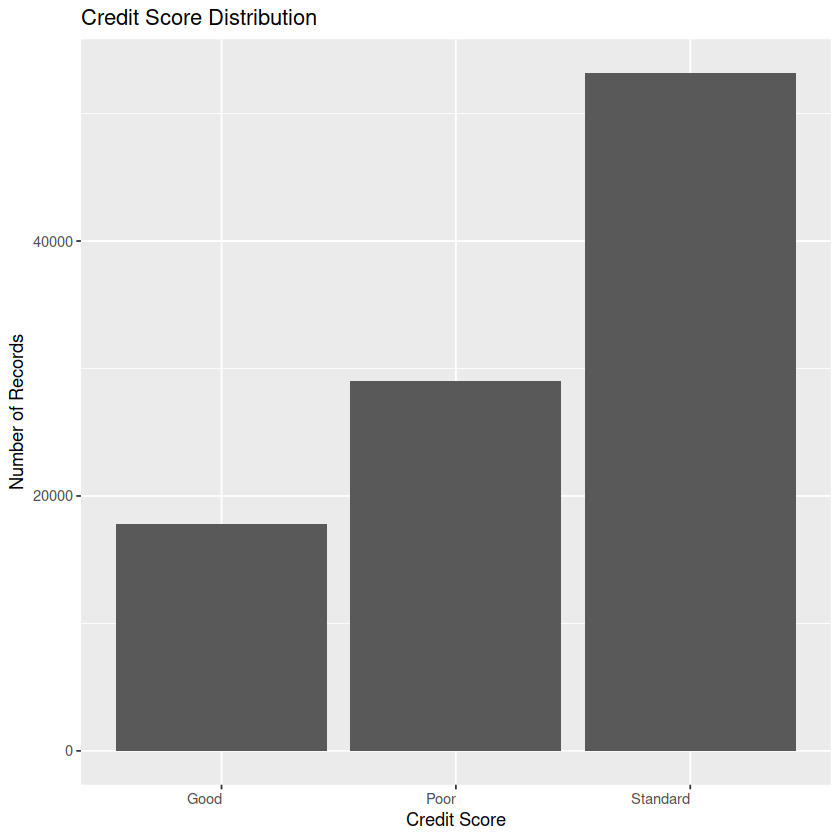

In [21]:
column_name = 'Credit_Score'
user_friendly_name = 'Credit Score'

#Get Details
get_column_details(df_train,column_name)

#Plot Graph
plot_countplot(df_train,column_name,user_friendly_name)

In [22]:
get_column_details(df_train,'ID')

Details of ID column

DataType:  numeric 

There are no null values

Number of Unique Values:  100000 

Distribution of column:

  5634   5635   5636   5637   5638   5639   5640   5641   5646   5647   5648 
     1      1      1      1      1      1      1      1      1      1      1 
  5649   5650   5651   5652   5653   5658   5659   5660   5661   5662   5663 
     1      1      1      1      1      1      1      1      1      1      1 
  5664   5665   5670   5671   5672   5673   5674   5675   5676   5677   5682 
     1      1      1      1      1      1      1      1      1      1      1 
  5683   5684   5685   5686   5687   5688   5689   5694   5695   5696   5697 
     1      1      1      1      1      1      1      1      1      1      1 
  5698   5699   5700   5701   5706   5707   5708   5709   5710   5711   5712 
     1      1      1      1      1      1      1      1      1      1      1 
  5713   5718   5719   5720   5721   5722   5723   5724   5725   5730   5731 
     1      1

In [23]:
get_column_details(df_train,'Customer_ID')

Details of Customer_ID column

DataType:  character 

There are no null values

Number of Unique Values:  12500 

Distribution of column:

CUS_0x1000 CUS_0x1009 CUS_0x100b CUS_0x1011 CUS_0x1013 CUS_0x1015 CUS_0x1018 
         8          8          8          8          8          8          8 
CUS_0x1026 CUS_0x102d CUS_0x102e CUS_0x1032 CUS_0x1037 CUS_0x1038 CUS_0x103e 
         8          8          8          8          8          8          8 
CUS_0x1041 CUS_0x1044 CUS_0x1048 CUS_0x104a CUS_0x104e CUS_0x104f CUS_0x1051 
         8          8          8          8          8          8          8 
CUS_0x1056 CUS_0x1057 CUS_0x105b CUS_0x105c CUS_0x1063 CUS_0x1069 CUS_0x106f 
         8          8          8          8          8          8          8 
CUS_0x1075 CUS_0x107c CUS_0x107e CUS_0x1087 CUS_0x108a CUS_0x1096 CUS_0x1098 
         8          8          8          8          8          8          8 
CUS_0x109b CUS_0x109d CUS_0x109f CUS_0x10a9 CUS_0x10aa CUS_0x10ac CUS_0x10b3 
   

In [26]:
# Load required library
library(dplyr)

# Check if same customer can have different credit scores
unique_credit_scores <- df_train %>%
  group_by(Customer_ID) %>%
  summarize(num_unique_scores = n_distinct(Credit_Score))

print(unique_credit_scores)



# A tibble: 12,500 × 2
   Customer_ID num_unique_scores
   <chr>                   <int>
 1 CUS_0x1000                  2
 2 CUS_0x1009                  1
 3 CUS_0x100b                  2
 4 CUS_0x1011                  1
 5 CUS_0x1013                  1
 6 CUS_0x1015                  2
 7 CUS_0x1018                  1
 8 CUS_0x1026                  1
 9 CUS_0x102d                  1
10 CUS_0x102e                  2
# ℹ 12,490 more rows


In [28]:
column_name = 'Month'

#Get Details
get_column_details(df_train,column_name)

#Plot Distrbution with Credit_Score
#plot_stacked_bar(df_train,column_name,'Credit_Score')

Details of Month column

DataType:  character 

There are no null values

Number of Unique Values:  8 

Distribution of column:

   April   August February  January     July     June    March      May 
   12500    12500    12500    12500    12500    12500    12500    12500 


In [30]:
# Define a vector of month names
months_vec <- c("January", "February", "March", "April", "May", "June",
                "July", "August", "September", "October", "November", "December")

# Convert Month to datetime object
df_train$Month <- match(df_train$Month, months_vec)


# Cleanring Name missing values

In [31]:
column_name = 'Name'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_categorical_field(df_train,group_by,column_name)

Details of Name column

DataType:  character 

There are no null values

Number of Unique Values:  10140 

Distribution of column:

                                              Mattr                     Mattx 
                     9985                         7                         6 
                   Stevei                    Stevep                   Thomasf 
                        7                         8                         7 
                  , Asiac                   , Asiaf                   , Asiaw 
                        8                         8                         8 
                      , e               , Europeanx                 , Globalf 
                        7                         6                        15 
                , Globali                 , Globalq                 , Globalt 
                        5                         5                         7 
                , Globalw          "Eileen OGrady"c          "Eileen OGrady"s 

In [32]:
column_name = 'SSN'
group_by = 'Customer_ID'
garbage_value = '#F%$D@*&8'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_categorical_field(df_train,group_by,column_name,garbage_value)

Details of SSN column

DataType:  character 

There are no null values

Number of Unique Values:  12501 

Distribution of column:

  #F%$D@*&8 000-08-1349 000-40-3312 000-58-0568 000-60-0688 000-63-0442 
       5572           8           8           8           8           7 
000-80-0683 000-86-6182 000-89-3828 000-89-4910 000-89-8752 000-92-4286 
          8           8           8           7           8           7 
000-95-4380 001-06-5634 001-06-7616 001-11-0655 001-30-8624 001-41-8258 
          8           7           7           8           8           8 
001-43-6015 001-49-5189 001-50-2460 001-51-4145 001-64-0430 001-67-3534 
          8           8           8           8           7           8 
001-68-2340 001-70-8319 001-84-7802 001-85-7613 001-91-2742 001-92-5338 
          7           8           8           7           7           7 
001-96-0566 001-96-3136 001-96-4399 001-97-1222 001-98-8608 002-00-8104 
          7           8           8           8           8       

In [35]:
column_name = 'Occupation'
group_by = 'Customer_ID'
garbage_value = '_______'
user_friendly_name = 'Occupation'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_categorical_field(df_train,group_by,column_name,garbage_value)

#Plot Distribution with Credit_Score
#plot_stacked_bar(df_train,column_name,'Credit_Score',rotation=60)

Details of Occupation column

DataType:  character 

There are no null values

Number of Unique Values:  16 

Distribution of column:

      _______    Accountant     Architect     Developer        Doctor 
         7062          6271          6355          6235          6087 
     Engineer  Entrepreneur    Journalist        Lawyer       Manager 
         6350          6174          6085          6575          5973 
     Mechanic Media_Manager      Musician     Scientist       Teacher 
         6291          6232          5911          6299          6215 
       Writer 
         5885 



-----------------------------------------------------

Cleaning steps

Garbage value _______ is replaced with NA

No. of missing values before filling with group mode: 7062 

No. of missing values after filling with group mode: 0 


In [36]:
get_column_details(df_train,'Type_of_Loan')

Details of Type_of_Loan column

DataType:  character 

There are no null values

Number of Unique Values:  6261 

Distribution of column:

                                                                                                                                                                                       
                                                                                                                                                                                 11408 
                                                                                                                                                                             Auto Loan 
                                                                                                                                                                                  1152 
                                                                                                                             

In [37]:
# Load required library
library(dplyr)

# Handle Type of Loan null values
df_train <- df_train %>%
  mutate(Type_of_Loan = ifelse(is.na(Type_of_Loan), "Not Specified", Type_of_Loan))


In [38]:
column_name = 'Credit_Mix'
group_by = 'Customer_ID'
garbage_value = '_'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_categorical_field(df_train,group_by,column_name,garbage_value)

Details of Credit_Mix column

DataType:  character 

There are no null values

Number of Unique Values:  4 

Distribution of column:

       _      Bad     Good Standard 
   20195    18989    24337    36479 

-----------------------------------------------------

Cleaning steps

Garbage value _ is replaced with NA

No. of missing values before filling with group mode: 20195 

No. of missing values after filling with group mode: 0 


In [39]:
column_name = 'Payment_of_Min_Amount'

#Get Details
get_column_details(df_train,column_name)


Details of Payment_of_Min_Amount column

DataType:  character 

There are no null values

Number of Unique Values:  3 

Distribution of column:

   NM    No   Yes 
12007 35667 52326 


In [40]:
column_name = 'Payment_Behaviour'
group_by = 'Customer_ID'
garbage_value = '!@9#%8'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_categorical_field(df_train,group_by,column_name,garbage_value)

Details of Payment_Behaviour column

DataType:  character 

There are no null values

Number of Unique Values:  7 

Distribution of column:

                          !@9#%8  High_spent_Large_value_payments 
                            7600                            13721 
High_spent_Medium_value_payments  High_spent_Small_value_payments 
                           17540                            11340 
  Low_spent_Large_value_payments  Low_spent_Medium_value_payments 
                           10425                            13861 
  Low_spent_Small_value_payments 
                           25513 

-----------------------------------------------------

Cleaning steps

Garbage value !@9#%8 is replaced with NA

No. of missing values before filling with group mode: 7600 

No. of missing values after filling with group mode: 0 


In [46]:
# Get Details
get_column_details(df_train, "Age")

# Cleaning
df_train <- clean_numerical_field(df_train, Customer_ID, Age, strip = "_", datatype = "integer")



Details of Age column

DataType:  character 

There are no null values

Number of Unique Values:  1788 

Distribution of column:

 -500   100  1004  1006  1010   102  1022  1024  1028  1032  1033  1040  1051 
  886     1     1     1     1     1     1     1     1     1     1     1     1 
 1053  1062  1066 1070_  1083  1087   109  1094  1095  1101 1102_   111  1110 
    1     1     1     1     2     1     1     1     1     1     1     1     1 
 1112  1116  1119   112  1131  1133  1136  1143  1144  1148  1149   115  1154 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
 1170  1171  1172  1174  1176   118  1188 1188_  1191  1197  1200  1202  1203 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
 1206  1217  1220  1225  1227   123  1231  1232  1234  1235   124 1248_   126 
    2     1     2     1     1     1     1     1     1     1     1     1     1 
 1265  1270  1289  1294  1300  1306  1308  1310  1321  1322  1323  1324  1328 
 

ERROR: Error in (function(x, i, exact) if (is.matrix(i)) as.matrix(x)[[i]] else .subset2(x, : object 'Age' not found


In [49]:

# Get Details
get_column_details(df_train, "Annual_Income")

# Cleaning
df_train <- clean_numerical_field(df_train, Customer_ID, Annual_Income, strip = "_", datatype = "numeric")

Details of Annual_Income column

DataType:  character 

Number of Unique Values:  18940 

Distribution of column:

         10001727.0           10003.495          10003.495_           10004.805 
                  1                   7                   1                   8 
          100058.19          100058.19_           10007.815          10007894.0 
                  7                   1                   8                   1 
          10009.905           100097.19          100097.19_           100100.22 
                  8                   7                   1                   8 
          100127.82            100148.8           100188.84  100191.36000000002 
                  8                   8                   8                   7 
100191.36000000002_           100192.32          100192.32_            10021.72 
                  1                   5                   3                   7 
           100233.4            10024.25           10024.25_           10024

ERROR: Error in (function(x, i, exact) if (is.matrix(i)) as.matrix(x)[[i]] else .subset2(x, : object 'Annual_Income' not found


In [50]:
column_name = 'Monthly_Inhand_Salary'
group_by = 'Customer_ID'
user_friendly_name = 'Monthly Inhand Salary'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name)

Details of Monthly_Inhand_Salary column

DataType:  numeric 

Number of Unique Values:  13236 

Distribution of column:

303.645416666667        319.55625 332.128333333333        332.43125 
               8                7                7                6 
333.596666666667 355.208333333333 357.255833333333 358.058333333333 
               6                8                7                6 
361.603333333333 368.374166666667 373.071666666667 378.993333333333 
               6                7                7                7 
379.390833333333 379.602916666667 380.649166666667 382.701666666667 
               6                6                6                7 
391.053333333333        391.29125           391.89 393.159166666667 
               8                8                6                6 
       393.69875 395.664166666667 396.344166666667 403.254166666667 
               7                7                7                8 
405.253333333333 406.573333333333 407.078333333333 

ERROR: [1m[33mError[39m in `group_by()`:[22m
[1m[22m[33m![39m Must group by variables found in `.data`.
[31m✖[39m Column `group_by` is not found.


In [51]:
column_name = 'Num_Bank_Accounts'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Bank Accounts'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name)

Details of Num_Bank_Accounts column

DataType:  integer 

Number of Unique Values:  943 

Distribution of column:

   -1     0     1     2     3     4     5     6     7     8     9    10    11 
   21  4328  4490  4304 11950 12186 12118 13001 12823 12765  5443  5247     9 
   18    26    27    28    29    30    31    32    33    34    35    37    38 
    1     1     1     3     1     1     1     1     2     4     1     3     1 
   39    40    41    42    43    45    49    50    53    55    57    59    60 
    3     1     1     2     4     1     1     1     1     1     2     1     1 
   61    64    67    68    69    70    72    74    75    77    79    82    83 
    1     1     2     2     1     2     1     2     1     1     2     1     2 
   84    87    91    92    93    94    97    99   100   103   104   105   108 
    1     1     1     1     1     1     1     1     1     2     1     5     1 
  109   112   115   116   119   120   121   122   124   125   129   135   136 
    1     2     

ERROR: [1m[33mError[39m in `group_by()`:[22m
[1m[22m[33m![39m Must group by variables found in `.data`.
[31m✖[39m Column `group_by` is not found.


In [52]:
column_name = 'Num_Credit_Card'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Credit Card'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name)

Details of Num_Credit_Card column

DataType:  integer 

Number of Unique Values:  1179 

Distribution of column:

    0     1     2     3     4     5     6     7     8     9    10    11    15 
   13  2132  2149 13277 14030 18459 16559 16615  4956  4643  4860    36     3 
   16    17    18    20    21    22    24    25    26    27    28    29    31 
    2     1     1     1     1     2     1     5     1     3     4     2     2 
   33    34    35    36    37    38    39    41    43    44    46    48    49 
    2     2     1     3     4     1     3     1     4     2     1     2     1 
   50    51    52    53    54    56    57    58    60    61    62    64    65 
    1     4     2     1     2     1     1     1     2     4     1     3     1 
   66    67    69    70    71    72    73    75    76    77    80    81    82 
    4     1     2     3     4     3     2     3     3     3     1     2     2 
   83    84    85    86    87    89    90    92    95    96    97    98    99 
    4     2     1

ERROR: [1m[33mError[39m in `group_by()`:[22m
[1m[22m[33m![39m Must group by variables found in `.data`.
[31m✖[39m Column `group_by` is not found.


In [53]:
column_name = 'Interest_Rate'
group_by = 'Customer_ID'
user_friendly_name = 'Interest Rate'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name)

Details of Interest_Rate column

DataType:  integer 

Number of Unique Values:  1750 

Distribution of column:

   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2683 2465 2765 2589 4979 4721 4494 5012 4494 4540 4428 4540 2384 2229 3992 3730 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
3813 4102 3630 3929 1560 1720 1683 1685 1566 1489 1608 1616 1662 1690 1457 1742 
  33   34   59   60   64   67   73   74   75   76   77   81   87   89   91   92 
1467 1502    1    1    1    1    1    1    2    2    1    1    1    1    1    1 
  94   95   98   99  100  101  102  106  107  108  113  115  120  128  136  137 
   1    2    1    1    1    1    1    1    2    1    1    2    1    2    1    1 
 140  142  144  146  151  159  160  162  170  174  177  186  197  200  203  206 
   1    1    1    2    1    1    1    1    1    1    1    1    1    1    1    1 
 207  208  213  215  219  224  232  238  243  246  247  249  259  260  261  26

ERROR: [1m[33mError[39m in `group_by()`:[22m
[1m[22m[33m![39m Must group by variables found in `.data`.
[31m✖[39m Column `group_by` is not found.


Details of Num_Credit_Card column

DataType:  integer 

Number of Unique Values:  1179 

Distribution of column:

    0     1     2     3     4     5     6     7     8     9    10    11    15 
   13  2132  2149 13277 14030 18459 16559 16615  4956  4643  4860    36     3 
   16    17    18    20    21    22    24    25    26    27    28    29    31 
    2     1     1     1     1     2     1     5     1     3     4     2     2 
   33    34    35    36    37    38    39    41    43    44    46    48    49 
    2     2     1     3     4     1     3     1     4     2     1     2     1 
   50    51    52    53    54    56    57    58    60    61    62    64    65 
    1     4     2     1     2     1     1     1     2     4     1     3     1 
   66    67    69    70    71    72    73    75    76    77    80    81    82 
    4     1     2     3     4     3     2     3     3     3     1     2     2 
   83    84    85    86    87    89    90    92    95    96    97    98    99 
    4     2     1

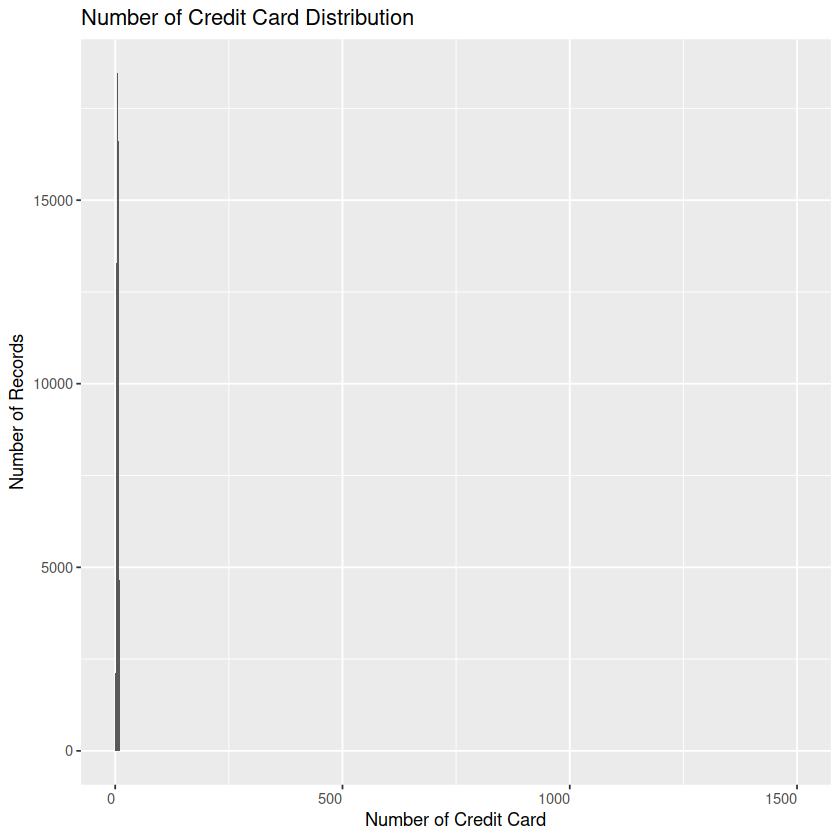

In [54]:
# Load required libraries
library(dplyr)
library(tidyr)
library(ggplot2)

# Define the functions
get_column_details <- function(df, column) {
  cat("Details of", column, "column\n")
  cat("\nDataType: ", class(df[[column]]), "\n")
  cat("\nNumber of Unique Values: ", length(unique(df[[column]])), "\n")
  cat("\nDistribution of column:\n")
  print(table(df[[column]]))
}

clean_numerical_field <- function(df, groupby, column) {
  cat("\n-----------------------------------------------------\n")
  cat("\nCleaning steps\n")
  
  df_cleaned <- df %>%
    group_by({{ groupby }}) %>%
    mutate({{ column }} := ifelse(is.na({{ column }}) | {{ column }} < 0, NA, {{ column }})) %>%
    mutate({{ column }} := ifelse(is.na({{ column }}), mean({{ column }}, na.rm = TRUE), {{ column }})) %>%
    ungroup()
  
  return(df_cleaned)
}

plot_countplot <- function(df, column, user_friendly_column_name, rotation = 0) {
  cat("\n-----------------------------------------------------\n")
  cat(paste("\n", user_friendly_column_name, "Distribution\n", sep = ""))
  
  # Create the plot
  plot <- ggplot(df, aes(x = .data[[column]])) +
    geom_bar() +
    labs(x = user_friendly_column_name, y = "Number of Records", title = paste(user_friendly_column_name, "Distribution")) +
    theme(axis.text.x = element_text(angle = rotation, hjust = 1))
  
  # Display the plot
  print(plot)
}

# Get Details
get_column_details(df_train, "Num_Credit_Card")

# Cleaning
df_train <- clean_numerical_field(df_train, Customer_ID, Num_Credit_Card)

# Plot Graph
plot_countplot(df_train, "Num_Credit_Card", "Number of Credit Card")


Details of Interest_Rate column

DataType:  integer 

Number of Unique Values:  1750 

Distribution of column:

   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2683 2465 2765 2589 4979 4721 4494 5012 4494 4540 4428 4540 2384 2229 3992 3730 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
3813 4102 3630 3929 1560 1720 1683 1685 1566 1489 1608 1616 1662 1690 1457 1742 
  33   34   59   60   64   67   73   74   75   76   77   81   87   89   91   92 
1467 1502    1    1    1    1    1    1    2    2    1    1    1    1    1    1 
  94   95   98   99  100  101  102  106  107  108  113  115  120  128  136  137 
   1    2    1    1    1    1    1    1    2    1    1    2    1    2    1    1 
 140  142  144  146  151  159  160  162  170  174  177  186  197  200  203  206 
   1    1    1    2    1    1    1    1    1    1    1    1    1    1    1    1 
 207  208  213  215  219  224  232  238  243  246  247  249  259  260  261  26

Warning message:
“Removed 2034 rows containing non-finite values (`stat_count()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_bar()`).”


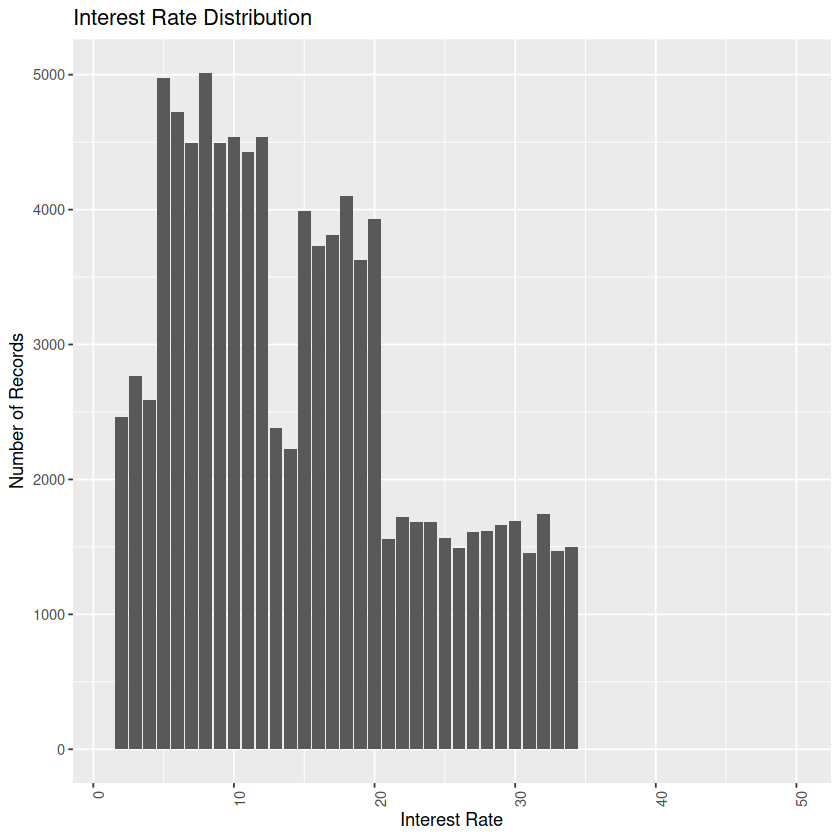

In [62]:
# Load required libraries
library(dplyr)
library(tidyr)
library(ggplot2)

# Define the functions
get_column_details <- function(df, column) {
  cat("Details of", column, "column\n")
  cat("\nDataType: ", class(df[[column]]), "\n")
  cat("\nNumber of Unique Values: ", length(unique(df[[column]])), "\n")
  cat("\nDistribution of column:\n")
  print(table(df[[column]]))
}

clean_numerical_field <- function(df, groupby, column) {
  cat("\n-----------------------------------------------------\n")
  cat("\nCleaning steps\n")
  
  df_cleaned <- df %>%
    group_by({{ groupby }}) %>%
    mutate({{ column }} := ifelse(is.na({{ column }}) | {{ column }} < 0, NA, {{ column }})) %>%
    mutate({{ column }} := ifelse(is.na({{ column }}), mean({{ column }}, na.rm = TRUE), {{ column }})) %>%
    ungroup()
  
  return(df_cleaned)
}

plot_countplot <- function(df, column, user_friendly_column_name, rotation = 0) {
  cat("\n-----------------------------------------------------\n")
  cat(paste("\n", user_friendly_column_name, "Distribution\n", sep = ""))
  
  # Create the plot
  plot <- ggplot(df, aes(x = .data[[column]])) +
    geom_bar() + xlim(1, 50)+
    labs(x = user_friendly_column_name, y = "Number of Records", title = paste(user_friendly_column_name, "Distribution")) +
    theme(axis.text.x = element_text(angle = rotation, hjust = 1))
  
  # Display the plot
  print(plot)
}

# Get Details
get_column_details(df_train, "Interest_Rate")

# Cleaning
df_train <- clean_numerical_field(df_train, Customer_ID, Interest_Rate)

# Plot Graph
plot_countplot(df_train, "Interest_Rate", "Interest Rate", rotation = 90)


Details of Delay_from_due_date column

DataType:  numeric 

Number of Unique Values:  126 

Distribution of column:

                0 0.142857142857143 0.166666666666667               0.2 
             1250                 7                 4                 3 
0.285714285714286 0.333333333333333 0.428571428571429               0.5 
                8                 7                 7                10 
0.571428571428571 0.666666666666667 0.714285714285714 0.833333333333333 
                3                14                 3                20 
0.857142857142857                 1  1.14285714285714  1.16666666666667 
                3              1392                 7                 6 
             1.25  1.28571428571429  1.33333333333333  1.42857142857143 
                4                15                10                18 
              1.5  1.57142857142857  1.66666666666667  1.71428571428571 
                6                 9                10                 8 
       

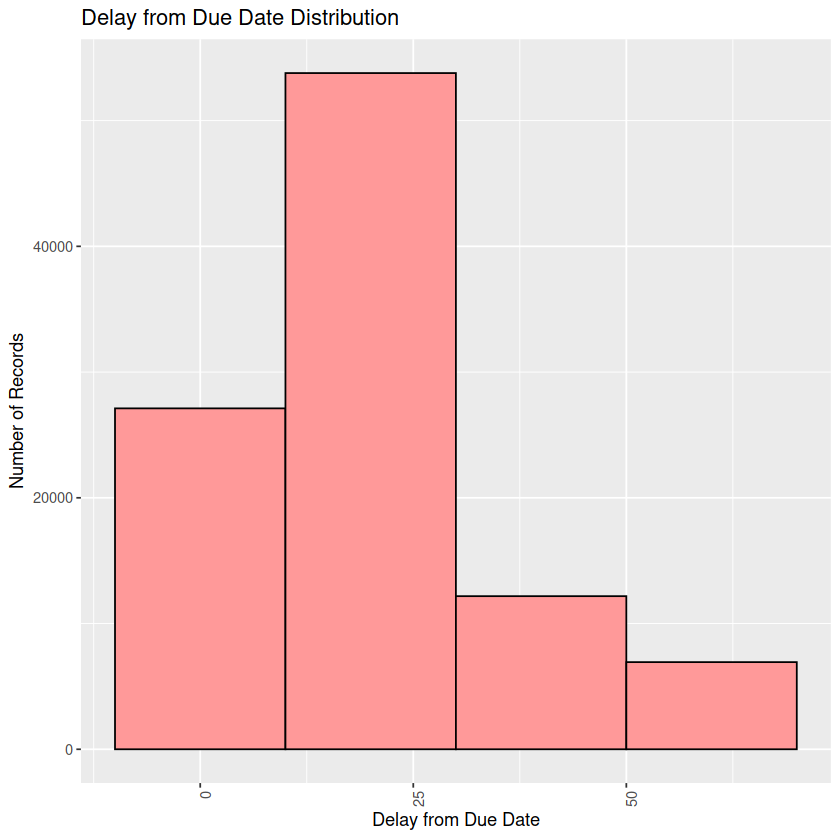

In [64]:
# Load required libraries
library(dplyr)
library(tidyr)
library(ggplot2)

# Define the functions
get_column_details <- function(df, column) {
  cat("Details of", column, "column\n")
  cat("\nDataType: ", class(df[[column]]), "\n")
  cat("\nNumber of Unique Values: ", length(unique(df[[column]])), "\n")
  cat("\nDistribution of column:\n")
  print(table(df[[column]]))
}

clean_numerical_field <- function(df, groupby, column) {
  cat("\n-----------------------------------------------------\n")
  cat("\nCleaning steps\n")
  
  df_cleaned <- df %>%
    group_by({{ groupby }}) %>%
    mutate({{ column }} := ifelse(is.na({{ column }}) | {{ column }} < 0, NA, {{ column }})) %>%
    mutate({{ column }} := ifelse(is.na({{ column }}), mean({{ column }}, na.rm = TRUE), {{ column }})) %>%
    ungroup()
  
  return(df_cleaned)
}

plot_displot <- function(df, column, user_friendly_column_name, rotation = 0, bins = 20) {
  cat("\n-----------------------------------------------------\n")
  cat(paste("\n", user_friendly_column_name, "Distribution\n", sep = ""))
  
  # Create the plot
  plot <- ggplot(df, aes(x = .data[[column]])) +
    geom_histogram(binwidth = bins, color = "black", fill = "#FF9999") +
    labs(x = user_friendly_column_name, y = "Number of Records", title = paste(user_friendly_column_name, "Distribution")) +
    theme(axis.text.x = element_text(angle = rotation, hjust = 1))
  
  # Display the plot
  print(plot)
}

# Get Details
get_column_details(df_train, "Delay_from_due_date")

# Cleaning
df_train <- clean_numerical_field(df_train, Customer_ID, Delay_from_due_date)

# Plot Graph
plot_displot(df_train, "Delay_from_due_date", "Delay from Due Date", rotation = 90)


In [66]:
# Get the count of unique values in the "Credit_History_Age" column
credit_history_age_counts <- table(df_train$Credit_History_Age)

# Print the count of unique values
print(credit_history_age_counts)



  0 Years and 1 Months  0 Years and 10 Months  0 Years and 11 Months 
                     2                     79                     77 
  0 Years and 2 Months   0 Years and 3 Months   0 Years and 4 Months 
                    15                     20                     35 
  0 Years and 5 Months   0 Years and 6 Months   0 Years and 7 Months 
                    42                     41                     52 
  0 Years and 8 Months   0 Years and 9 Months   1 Years and 0 Months 
                    59                     68                     67 
  1 Years and 1 Months  1 Years and 10 Months  1 Years and 11 Months 
                    70                     95                     83 
  1 Years and 2 Months   1 Years and 3 Months   1 Years and 4 Months 
                    77                     87                     94 
  1 Years and 5 Months   1 Years and 6 Months   1 Years and 7 Months 
                    91                     74                     81 
  1 Years and 8 Mon

In [67]:
Month_Converter <- function(val) {
  if (!is.na(val)) {
    parts <- unlist(strsplit(val, " "))
    years <- as.integer(parts[1])
    month <- as.integer(parts[4])
    return ((years * 12) + month)
  } else {
    return (val)
  }
}

In [72]:
# Load required libraries
library(dplyr)
library(tidyr)
library(ggplot2)

# Define the functions
get_column_details <- function(df, column) {
  cat("Details of", column, "column\n")
  cat("\nDataType: ", class(df[[column]]), "\n")
  cat("\nNumber of Unique Values: ", length(unique(df[[column]])), "\n")
  cat("\nDistribution of column:\n")
  print(table(df[[column]]))
}

clean_numerical_field <- function(df, groupby, column, datatype) {
  cat("\n-----------------------------------------------------\n")
  cat("\nCleaning steps\n")
  
  df_cleaned <- df %>%
    group_by({{ groupby }}) %>%
    mutate({{ column }} := ifelse(is.na({{ column }}) | {{ column }} < 0, NA, {{ column }})) %>%
    mutate({{ column }} := ifelse(is.na({{ column }}), mean({{ column }}, na.rm = TRUE), {{ column }})) %>%
    ungroup()
  
  # Change datatype
  df_cleaned[[column]] <- as(datatype)(df_cleaned[[column]])
  cat(sprintf("\nDatatype of %s is changed to %s\n", column, datatype))
  
  return(df_cleaned)
}


# Get Details
get_column_details(df_train, "Credit_History_Age")

# Cleaning
df_train <- clean_numerical_field(df_train, Customer_ID, Credit_History_Age, datatype = "numeric")




Details of Credit_History_Age column

DataType:  character 

Number of Unique Values:  405 

Distribution of column:

  0 Years and 1 Months  0 Years and 10 Months  0 Years and 11 Months 
                     2                     79                     77 
  0 Years and 2 Months   0 Years and 3 Months   0 Years and 4 Months 
                    15                     20                     35 
  0 Years and 5 Months   0 Years and 6 Months   0 Years and 7 Months 
                    42                     41                     52 
  0 Years and 8 Months   0 Years and 9 Months   1 Years and 0 Months 
                    59                     68                     67 
  1 Years and 1 Months  1 Years and 10 Months  1 Years and 11 Months 
                    70                     95                     83 
  1 Years and 2 Months   1 Years and 3 Months   1 Years and 4 Months 
                    77                     87                     94 
  1 Years and 5 Months   1 Years and 6 Mon


-----------------------------------------------------

Cleaning steps


Warning message:
“There were 6650 warnings in `mutate()`.
The first warning was:
ℹ In argument: `Credit_History_Age = ifelse(...)`.
ℹ In group 2: `Customer_ID = "CUS_0x1009"`.
Caused by warning in `mean.default()`:
! argument is not numeric or logical: returning NA
ℹ Run `dplyr::last_dplyr_warnings()` to see the 6649 remaining warnings.”


ERROR: Error in .identC(thisClass, Class): argument "Class" is missing, with no default


In [70]:
# Load required libraries
library(dplyr)
library(tidyr)
library(ggplot2)

# Define the functions
get_column_details <- function(df, column) {
  cat("Details of", column, "column\n")
  cat("\nDataType: ", class(df[[column]]), "\n")
  cat("\nNumber of Unique Values: ", length(unique(df[[column]])), "\n")
  cat("\nDistribution of column:\n")
  print(table(df[[column]]))
}

clean_numerical_field <- function(df, groupby, column) {
  cat("\n-----------------------------------------------------\n")
  cat("\nCleaning steps\n")
  
  df_cleaned <- df %>%
    group_by({{ groupby }}) %>%
    mutate({{ column }} := ifelse(is.na({{ column }}) | {{ column }} < 0, NA, {{ column }})) %>%
    mutate({{ column }} := ifelse(is.na({{ column }}), mean({{ column }}, na.rm = TRUE), {{ column }})) %>%
    ungroup()
  
  return(df_cleaned)
}



# Get Details
get_column_details(df_train, "Num_Credit_Inquiries")

# Cleaning
df_train <- clean_numerical_field(df_train, Customer_ID, Num_Credit_Inquiries)



Details of Num_Credit_Inquiries column

DataType:  numeric 

Number of Unique Values:  1521 

Distribution of column:

                0 0.142857142857143 0.285714285714286 0.428571428571429 
             7058                 2                 4                 2 
              0.5 0.571428571428571 0.714285714285714               0.8 
                2                 6                 7                 3 
0.857142857142857                 1  1.14285714285714  1.28571428571429 
                8              7663                10                 6 
 1.42857142857143               1.5  1.57142857142857  1.66666666666667 
               14                 4                11                 6 
 1.71428571428571  1.83333333333333  1.85714285714286                 2 
               17                 4                10              8122 
 2.14285714285714  2.16666666666667  2.28571428571429  2.33333333333333 
               14                 2                 8                 6 
 2.42

In [88]:
# Define the Month_Converter function in R
Month_Converter <- function(val) {
  if (!is.na(val)) {
    years <- as.integer(strsplit(val, " ")[[1]][1])
    month <- as.integer(strsplit(val, " ")[[1]][4])
    return ((years * 12) + month)
  } else {
    return (val)
  }
}

# Apply the Month_Converter function to the Credit_History_Age column
df_train$Credit_History_Age <- sapply(df_train$Credit_History_Age, Month_Converter)

# Convert the Credit_History_Age column to float (numeric) type
df_train$Credit_History_Age <- as.numeric(df_train$Credit_History_Age)


Details of Credit_History_Age column

DataType:  numeric 

Number of Unique Values:  405 

Distribution of column:

  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  2  15  20  35  42  41  52  59  68  79  77  67  70  77  87  94  91  74  81  89 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
 93  95  83  72  84  97  90  83  82  73  68  81  68  67  73  64  63  76  73  76 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
 74  69  64  66  58  64  62  50  59  60  66  63  73  60  61  70  61  63  76  68 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
 77 106 123 144 177 171 182 220 244 258 263 230 228 273 269 268 283 247 244 275 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
258 251 228 201 177 215 205 211 214 194 194 240 231 240 253 222 225 246 252 247 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 11

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `column_name = as.numeric(column_name)`.
ℹ In group 1: `"Customer_ID" = "Customer_ID"`.
Caused by warning:
! NAs introduced by coercion”



-----------------------------------------------------

Credit History AgeDistribution


Warning message:
“Removed 9030 rows containing non-finite values (`stat_density()`).”


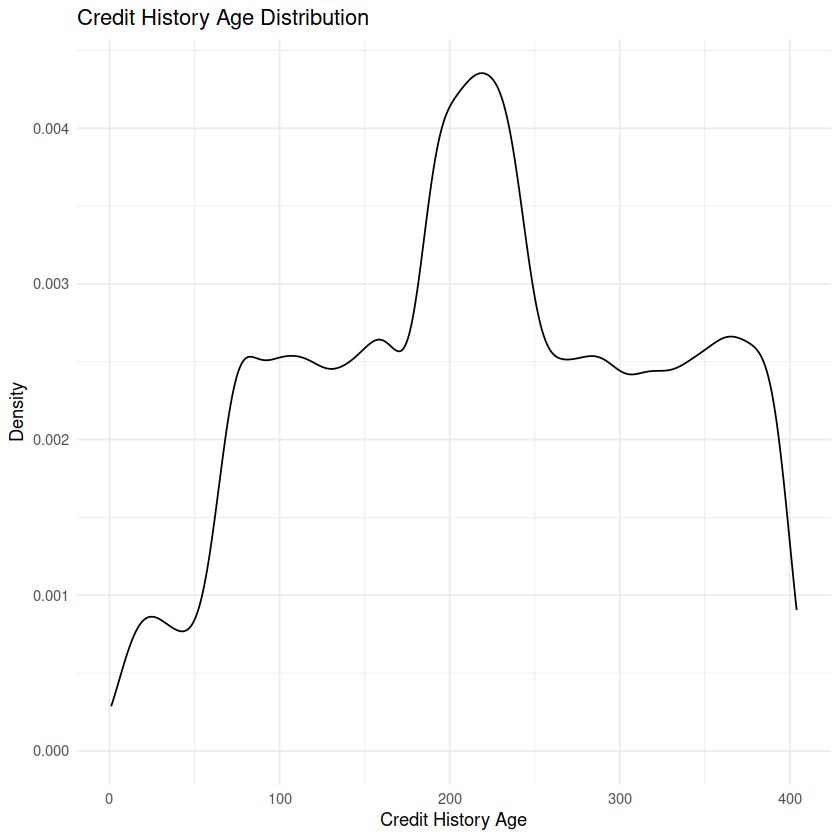

In [92]:
library(dplyr)
library(ggplot2)

# Define the get_column_details function in R
get_column_details <- function(df, column) {
  cat("Details of", column, "column\n")
  cat("\nDataType: ", class(df[[column]]), "\n")
  cat("\nNumber of Unique Values: ", length(unique(df[[column]])), "\n")
  cat("\nDistribution of column:\n")
  print(table(df[[column]]))
}

# Define the clean_numerical_field function in R
clean_numerical_field <- function(df, groupby, column, datatype) {
  cat("\n-----------------------------------------------------\n")
  cat("\nCleaning steps\n")
  
  df_cleaned <- df %>%
    group_by({{ groupby }}) %>%
    mutate({{ column }} := as.numeric({{ column }})) %>%
    ungroup()
  
  return(df_cleaned)
}

# Define the plot_displot function in R
plot_displot <- function(df, column, user_friendly_column_name) {
  cat("\n-----------------------------------------------------\n")
  cat(paste("\n", user_friendly_column_name, "Distribution\n", sep = ""))
  
  # Create the plot
  plot <- ggplot(df, aes(x = .data[[column]])) +
    geom_density() +
    labs(x = user_friendly_column_name, y = "Density", title = paste(user_friendly_column_name, "Distribution")) +
    theme_minimal()
  
  # Display the plot
  print(plot)
}

# Usage of the functions
column_name <- 'Credit_History_Age'
group_by <- 'Customer_ID'
user_friendly_name <- 'Credit History Age'

# Get Details
get_column_details(df_train, column_name)

# Cleaning
df_train <- clean_numerical_field(df_train, {{ group_by }}, column_name, datatype = float)

# Plot Graph
plot_displot(df_train, column_name, user_friendly_name)


In [93]:
head(df_train)

Month Age  Occupation Annual_Income Monthly_Inhand_Salary Num_Bank_Accounts
1 1     23   1          19114.12      1824.843              3                
2 2     23   1          19114.12            NA              3                
3 3     -500 1          19114.12            NA              3                
4 4     23   1          19114.12            NA              3                
5 5     23   1          19114.12      1824.843              3                
6 6     23   1          19114.12            NA              3                
  Num_Credit_Card Interest_Rate Num_of_Loan Type_of_Loan ⋯
1 4               3             4           1            ⋯
2 4               3             4           1            ⋯
3 4               3             4           1            ⋯
4 4               3             4           1            ⋯
5 4               3             4           1            ⋯
6 4               3             4           1            ⋯
  Credit_Utilization_Ratio Credit_History_Age Payment_of_Min_Amount
1 26.82262                 265                1                    
2 31.94496                  NA                1                    
3 28.60935                 267                1                    
4 31.37786                 268                1                    
5 24.79735                 269                1                    
6 27.26226                 270                1                    
  Total_EMI_per_month Amount_invested_monthly Payment_Behaviour
1 49.57495            80.41529543900253       1                
2 49.57495            118.28022162236736      2                
3 49.57495            81.699521264648         3                
4 49.57495            199.4580743910713       4                
5 49.57495            41.420153086217326      5                
6 49.57495            62.430172331195294      6                
  Monthly_Balance    Credit_Score "Customer_ID" column_name
1 312.49408867943663 1            Customer_ID   NA         
2 284.62916249607184 1            Customer_ID   NA         
3 331.2098628537912  1            Customer_ID   NA         
4 223.45130972736786 1            Customer_ID   NA         
5 341.48923103222177 1            Customer_ID   NA         
6 340.4792117872438  1            Customer_ID   NA

# Done Data prre processing

In [94]:
# Count missing values in each column of df_train
na_counts <- colSums(is.na(df_train))

# Print the number of missing values for each column
print(na_counts)


                   Month                      Age               Occupation 
                       0                        0                        0 
           Annual_Income    Monthly_Inhand_Salary        Num_Bank_Accounts 
                       0                    15002                        0 
         Num_Credit_Card            Interest_Rate              Num_of_Loan 
                       0                        0                        0 
            Type_of_Loan      Delay_from_due_date   Num_of_Delayed_Payment 
                       0                        0                        0 
    Changed_Credit_Limit     Num_Credit_Inquiries               Credit_Mix 
                       0                        0                        0 
        Outstanding_Debt Credit_Utilization_Ratio       Credit_History_Age 
                       0                        0                     9030 
   Payment_of_Min_Amount      Total_EMI_per_month  Amount_invested_monthly 
            

In [75]:
# Export the cleaned dataframe to a CSV file
write.csv(df_train, "from_r.csv", row.names = FALSE)


In [76]:
# Print the size of the dataset before dropping columns
cat("Size of Dataset before dropping columns : ", nrow(df_train), "rows and ", ncol(df_train), "columns\n")

# Define the columns to drop
drop_columns <- c("ID", "Customer_ID", "Name", "SSN")

# Drop the columns
df_train <- df_train[, !names(df_train) %in% drop_columns]

# Print the size of the dataset after dropping columns
cat("Size of Dataset after dropping columns : ", nrow(df_train), "rows and ", ncol(df_train), "columns\n")


Size of Dataset before dropping columns :  100000 rows and  28 columns
Size of Dataset after dropping columns :  100000 rows and  24 columns


In [78]:
# Load the forcats package for categorical encoding
library(forcats)

# Define categorical columns
categorical_columns <- c("Occupation", "Type_of_Loan", "Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour", "Credit_Score")

# Loop through each column and apply label encoding
for (column in categorical_columns) {
  df_train[[column]] <- as.factor(df_train[[column]])  # Convert to factor if not already
  df_train[[column]] <- as.integer(factor(df_train[[column]], levels = unique(df_train[[column]])))
}

# Print the updated dataframe
print(df_train)


# A tibble: 100,000 × 24
   Month Age   Occupation Annual_Income Monthly_Inhand_Salary Num_Bank_Accounts
   <int> <chr>      <int> <chr>                         <dbl>             <int>
 1     1 23             1 19114.12                      1825.                 3
 2     2 23             1 19114.12                        NA                  3
 3     3 -500           1 19114.12                        NA                  3
 4     4 23             1 19114.12                        NA                  3
 5     5 23             1 19114.12                      1825.                 3
 6     6 23             1 19114.12                        NA                  3
 7     7 23             1 19114.12                      1825.                 3
 8     8 23             1 19114.12                      1825.                 3
 9     1 28_            2 34847.84                      3038.                 2
10     2 28             3 34847.84                      3038.                 2
# ℹ 99,990 more

In [79]:
# Print the first few rows of the dataframe
head(df_train)


Month Age  Occupation Annual_Income Monthly_Inhand_Salary Num_Bank_Accounts
1 1     23   1          19114.12      1824.843              3                
2 2     23   1          19114.12            NA              3                
3 3     -500 1          19114.12            NA              3                
4 4     23   1          19114.12            NA              3                
5 5     23   1          19114.12      1824.843              3                
6 6     23   1          19114.12            NA              3                
  Num_Credit_Card Interest_Rate Num_of_Loan Type_of_Loan ⋯ Credit_Mix
1 4               3             4           1            ⋯ 1         
2 4               3             4           1            ⋯ 2         
3 4               3             4           1            ⋯ 2         
4 4               3             4           1            ⋯ 2         
5 4               3             4           1            ⋯ 2         
6 4               3             4           1            ⋯ 2         
  Outstanding_Debt Credit_Utilization_Ratio Credit_History_Age   
1 809.98           26.82262                 22 Years and 1 Months
2 809.98           31.94496                 NA                   
3 809.98           28.60935                 22 Years and 3 Months
4 809.98           31.37786                 22 Years and 4 Months
5 809.98           24.79735                 22 Years and 5 Months
6 809.98           27.26226                 22 Years and 6 Months
  Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly
1 1                     49.57495            80.41529543900253      
2 1                     49.57495            118.28022162236736     
3 1                     49.57495            81.699521264648        
4 1                     49.57495            199.4580743910713      
5 1                     49.57495            41.420153086217326     
6 1                     49.57495            62.430172331195294     
  Payment_Behaviour Monthly_Balance    Credit_Score
1 1                 312.49408867943663 1           
2 2                 284.62916249607184 1           
3 3                 331.2098628537912  1           
4 4                 223.45130972736786 1           
5 5                 341.48923103222177 1           
6 6                 340.4792117872438  1

In [81]:
# Export the cleaned dataframe to a CSV file
write.csv(df_train, "noi.csv", row.names = FALSE)


In [82]:
# Splitting input and output data
X <- df_train[, !(names(df_train) %in% c("Credit_Score"))]
y <- df_train$Credit_Score

# Print the shapes of X and y
cat("Shape of X:", dim(X), "\n")
cat("Shape of y:", length(y), "\n")


Shape of X: 100000 23 
Shape of y: 100000 


In [95]:
# Load the data.table package for data manipulation
library(data.table)

# Check if all columns are numeric
if (all(sapply(X, is.numeric))) {
  # Normalize the data using Min-Max scaling
  X_scaled <- as.data.table(scale(as.matrix(X), center = FALSE, scale = apply(X, 2, max) - apply(X, 2, min)))
  
  # Print the first few rows of the normalized data
  head(X_scaled)
} else {
  cat("Error: Data contains non-numeric values. Please ensure all columns are numeric before normalization.")
}


Error: Data contains non-numeric values. Please ensure all columns are numeric before normalization.

In [96]:
str(df_train)

tibble [100,000 × 26] (S3: tbl_df/tbl/data.frame)
 $ Month                   : int [1:100000] 1 2 3 4 5 6 7 8 1 2 ...
 $ Age                     : chr [1:100000] "23" "23" "-500" "23" ...
 $ Occupation              : int [1:100000] 1 1 1 1 1 1 1 1 2 3 ...
 $ Annual_Income           : chr [1:100000] "19114.12" "19114.12" "19114.12" "19114.12" ...
 $ Monthly_Inhand_Salary   : num [1:100000] 1825 NA NA NA 1825 ...
 $ Num_Bank_Accounts       : int [1:100000] 3 3 3 3 3 3 3 3 2 2 ...
 $ Num_Credit_Card         : int [1:100000] 4 4 4 4 4 4 4 4 4 4 ...
 $ Interest_Rate           : int [1:100000] 3 3 3 3 3 3 3 3 6 6 ...
 $ Num_of_Loan             : chr [1:100000] "4" "4" "4" "4" ...
 $ Type_of_Loan            : int [1:100000] 1 1 1 1 1 1 1 1 2 2 ...
 $ Delay_from_due_date     : num [1:100000] 3 4.43 3 5 6 ...
 $ Num_of_Delayed_Payment  : chr [1:100000] "7" "" "7" "4" ...
 $ Changed_Credit_Limit    : chr [1:100000] "11.27" "11.27" "_" "6.27" ...
 $ Num_Credit_Inquiries    : num [1:100000] 4 4 4 

# Model

In [86]:
# Install ROSE package if not already installed
if (!requireNamespace("ROSE", quietly = TRUE)) {
  install.packages("ROSE")
}

# Load the ROSE package
library(ROSE)


Installing package into ‘/home/ziegler/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



Loaded ROSE 0.0-4




In [87]:
# Perform oversampling using ROSE
oversampled_data <- ovun.sample(Credit_Score ~ ., data = df_train, method = "over", N = 2 * sum(df_train$Credit_Score == 1))

# Check the value counts of the target variable after oversampling
table(oversampled_data$Credit_Score)


ERROR: Error in (function (formula, data, method, subset, na.action, N, p = 0.5, : The response variable must have 2 levels.

